In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplsoccer
import highlight_text
from mplsoccer import Bumpy, FontManager, add_image
from highlight_text import HighlightText, ax_text, fig_text
import cv2
from PIL import Image
from io import BytesIO
import requests
os.chdir("/Users/derricktan/Documents/Football Data")

In [3]:
df = pd.read_csv('PL 2020_21 Standings.csv')
df = df.drop('Team',axis=1)

In [4]:
df.head()

,Arsenal,Aston Villa,\nBrighton and Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Fulham,Leeds United,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Sheffield United,Southampton,Tottenham Hotspur,West Bromwich Albion,West Ham United,Wolverhampton Wanderers
0,1,17,12,18,3,7,8,15,9,2,6,19,20,4,13,10,11,16,14,5
1,3,9,8,14,11,5,2,18,10,1,4,7,15,13,17,19,6,20,16,12
2,5,4,12,18,9,6,3,20,7,1,2,13,14,10,19,15,8,17,11,16
3,4,2,15,18,7,12,1,20,8,3,5,14,16,9,19,11,6,17,10,13
4,5,2,16,18,8,14,1,20,10,4,3,11,15,13,19,12,7,17,9,6


In [5]:
match_week = ['Week' + " "+ str(num) for num in range(1,39)]

In [15]:
highlight_dict = {
        'Chelsea':'#51CAF1',
        'Liverpool':'#C8102E',
        'Leicester City' : '#FDBE11'
}

In [16]:
bumpy = Bumpy(
    scatter_color = '#282A2C', line_color='#252525',
    rotate_xticks=90,
    ticklabel_size = 15,
    scatter_primary = 'D',
    show_right = True,
    plot_labels = True,
    alignment_yvalue = .1,
    alignment_xvalue = .065
)

Text(0.82, 0.83, 'PL Logo: www.pngkit.com')

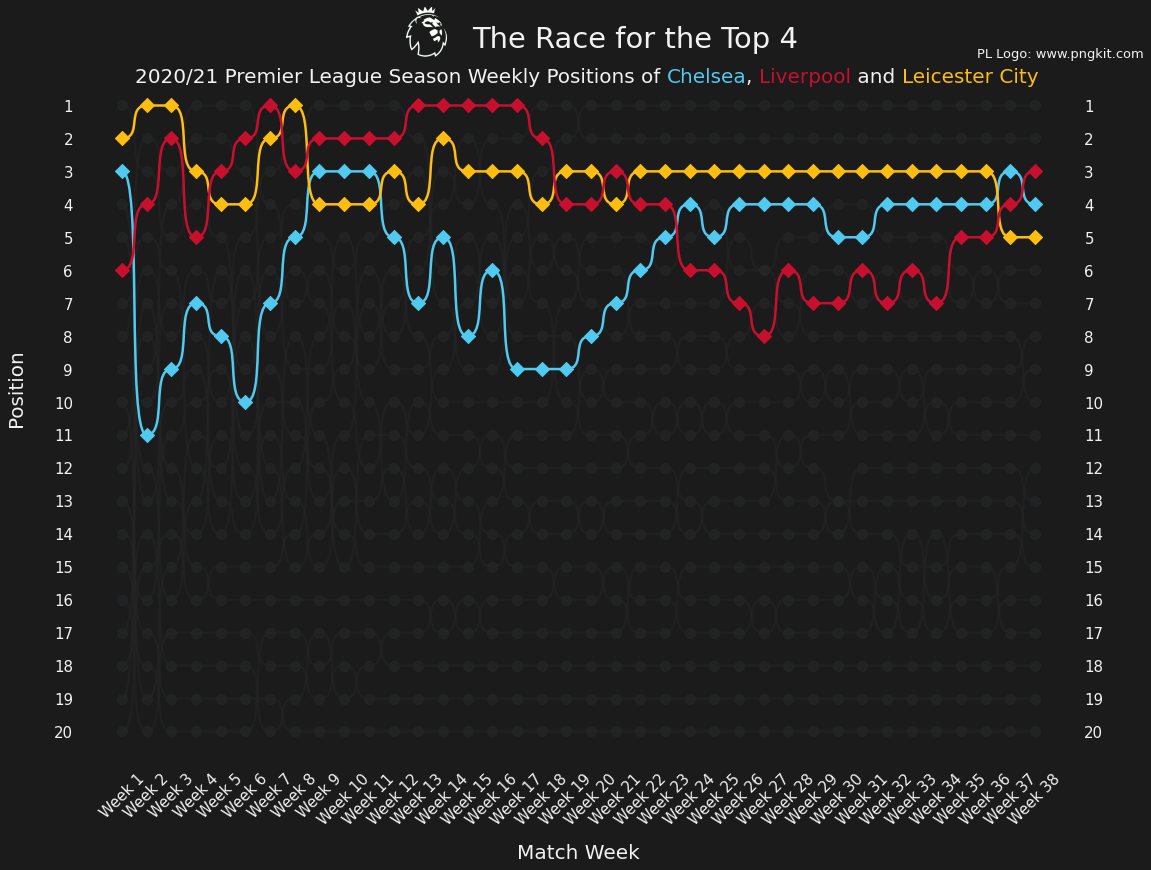

In [39]:
#plotting the bumpy chart
fig, ax = bumpy.plot(
    x_list=match_week,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=df,  # values having positions for each team
    secondary_alpha=0.5,   
    highlight_dict=highlight_dict,  
    figsize=(18, 14),  # size of the figure
    x_label='Match Week', y_label='Position',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5, # linewidth of the connecting lines
)

#setting the axis labels coordinates
ax.yaxis.set_label_coords(-0.05, 0.50)
ax.xaxis.set_label_coords(0.5,-0.1)

plt.xticks(rotation=45)

#defining the title and subtitle
TITLE = "The Race for the Top 4"
SUB_TITLE = "2020/21 Premier League Season Weekly Positions of <Chelsea>, <Liverpool> and <Leicester City>"

# add title
fig.text(0.43, 0.84, TITLE, size=29, color="#F2F2F2")

# add subtitle
fig_text(
    0.17, 0.82, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": '#51CAF1'}, {"color": '#C8102E'}, {"color": '#FDBE11'}],
    size=20, fig=fig)

#add PL Logo
ax2 = fig.add_axes([0.37,0.83,0.05,0.05])
ax2.axis('off')
img=Image.open('PL Logo white.png')
ax2.imshow(img)

#credits for PL Logo
fig.text(0.82,0.83, 'PL Logo: www.pngkit.com', size=13, color="#F2F2F2")

In [40]:
fig.savefig('Premier League 20-21 Top 4.png')